In [48]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [49]:
dataset=pd.read_csv('/content/CreditScoring_Dataset.csv')

In [50]:
dataset.shape

(3000, 30)

In [51]:
dataset.head()

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1,582,3,3,0,4,0.0,5,117,27,...,3.0,92%,21%,2,3,7,21%,4,4,0%
1,1,662,15,9,0,3,1.0,3,14,14,...,1.0,80%,0%,0,0,0,100%,12,0,100%
2,1,805,0,0,0,1,5.0,1,354,7,...,5.0,36%,65%,0,1,1,73%,1,1,53%
3,1,1175,8,5,0,6,1.0,10,16,4,...,3.0,91%,25%,1,1,1,75%,7,1,133%
4,1,1373,3,1,0,9,0.0,8,130,52,...,1.0,125%,0%,0,1,4,14%,3,1,0%


In [52]:
dataset=dataset.drop('ID',axis=1)

In [53]:
dataset.shape

(3000, 29)

In [54]:
dataset.isna().sum()

TARGET               0
DerogCnt             0
CollectCnt           0
BanruptcyInd         0
InqCnt06             0
InqTimeLast        188
InqFinanceCnt24      0
TLTimeFirst          0
TLTimeLast           0
TLCnt03              0
TLCnt12              0
TLCnt24              0
TLCnt                3
TLSum               40
TLMaxSum            40
TLSatCnt             4
TLDel60Cnt           0
TLBadCnt24           0
TL75UtilCnt         99
TL50UtilCnt         99
TLBalHCPct          41
TLSatPct             4
TLDel3060Cnt24       0
TLDel90Cnt24         0
TLDel60CntAll        0
TLOpenPct            3
TLBadDerogCnt        0
TLDel60Cnt24         0
TLOpen24Pct          3
dtype: int64

In [55]:
dataset.dropna(inplace=True)

In [56]:
dataset.shape

(2728, 29)

In [57]:
dataset.isna().sum()

TARGET             0
DerogCnt           0
CollectCnt         0
BanruptcyInd       0
InqCnt06           0
InqTimeLast        0
InqFinanceCnt24    0
TLTimeFirst        0
TLTimeLast         0
TLCnt03            0
TLCnt12            0
TLCnt24            0
TLCnt              0
TLSum              0
TLMaxSum           0
TLSatCnt           0
TLDel60Cnt         0
TLBadCnt24         0
TL75UtilCnt        0
TL50UtilCnt        0
TLBalHCPct         0
TLSatPct           0
TLDel3060Cnt24     0
TLDel90Cnt24       0
TLDel60CntAll      0
TLOpenPct          0
TLBadDerogCnt      0
TLDel60Cnt24       0
TLOpen24Pct        0
dtype: int64

In [58]:
import re
x=list(dataset['TLSum'])
for i in range(len(x)):
  x[i]=x[i][1::].replace(',','')
dataset['TLSum']=x

y=list(dataset['TLMaxSum'])
for i in range(len(y)):
  y[i]=y[i][1::].replace(',','')
dataset['TLMaxSum']=y

dataset['TLBalHCPct']=dataset['TLBalHCPct'].apply(lambda x: re.sub(r'[^0-9]', '', x))
dataset['TLSatPct']=dataset['TLSatPct'].apply(lambda x: re.sub(r'[^0-9]', '', x))
dataset['TLOpenPct']=dataset['TLOpenPct'].apply(lambda x: re.sub(r'[^0-9]', '', x))
dataset['TLOpen24Pct']=dataset['TLOpen24Pct'].apply(lambda x: re.sub(r'[^0-9]', '', x))

dataset['TLSum']=dataset['TLSum'].astype(int)
dataset['TLMaxSum']=dataset['TLMaxSum'].astype(int)
dataset['TLBalHCPct']=dataset['TLBalHCPct'].astype(int)
dataset['TLSatPct']=dataset['TLSatPct'].astype(int)
dataset['TLOpenPct']=dataset['TLOpenPct'].astype(int)
dataset['TLOpen24Pct']=dataset['TLOpen24Pct'].astype(int)

In [59]:
Y = dataset.iloc[:, 0].values
X = dataset.iloc[:, 1:29].values

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)

In [61]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [62]:
classifier =  LogisticRegression()
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)

In [63]:
print(confusion_matrix(Y_test,y_pred))

[[441  11]
 [ 80  14]]


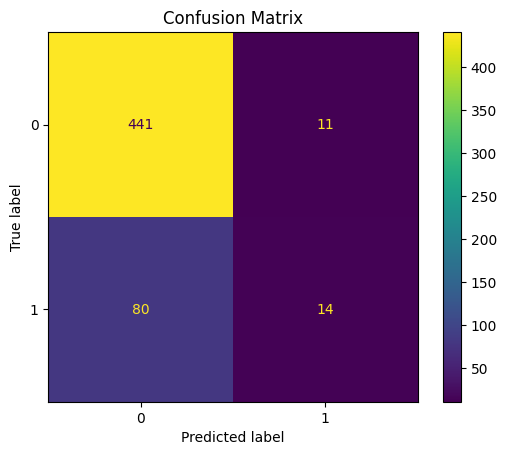

In [65]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred)
plt.title('Confusion Matrix')
plt.show()

In [64]:
print(accuracy_score(Y_test, y_pred))

0.8333333333333334
